# 猫狗大战 预处理数据

在此项目中，将对 [kaggle dogs vs. cats 数据集](https://www.kaggle.com/c/5441/download-all) 中的图片进行分类。该数据集主要包含猫狗和若干异常图片。项目需要预处理这些图片，然后基于预训练模型导出特征向量，构建一个融合模型，用特征向量进行训练。最后，由融合模型对测试集的图片作出是猫还是狗的预测。

## 获取数据

请登录kaggle，手动下载数据集[kaggle dogs vs. cats 数据集](https://www.kaggle.com/c/5441/download-all) ，并解压到[./data]目录下；或者通过kaggle命令直接下载train.zip和test.zip到[./data]目录下。
运行以下命令，
1. 检查是否存在目录[./data/train]和[.data/test]，不存在的话创建目录，将训练数据集压缩包train.zip、测试数据集压缩包test.zip分别解压到对应目录；
2. 将训练数据集解压后目录[./data/train]下的图片按照名称前缀cat或dog分别复制到[./data/train/cat]和[./data/train/dog]目录下。

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from os.path import isfile, isdir
import os
import zipfile

dataset_folder_path = os.getcwd() + '/data'
train_dataset_folder_path = dataset_folder_path + '/train'
test_dataset_folder_path = dataset_folder_path + '/test'

if not isdir(train_dataset_folder_path):
    with zipfile.ZipFile(dataset_folder_path + '/train.zip') as azip:
        azip.extractall(dataset_folder_path)
        azip.close()

if not isdir(test_dataset_folder_path):
    with zipfile.ZipFile(dataset_folder_path + '/test.zip') as bzip:
        bzip.extractall(test_dataset_folder_path)
        bzip.close()

destPathDog = train_dataset_folder_path + '/dog'
if not isdir(destPathDog):
    os.mkdir(destPathDog)

destPathCat = train_dataset_folder_path + '/cat'
if not isdir(destPathCat):
    os.mkdir(destPathCat)

for root, dirs, files in os.walk(train_dataset_folder_path):
    for fileName in files:
        filePathName = train_dataset_folder_path + '/' + fileName
        if not isfile(filePathName):
            continue
        if ('dog' == fileName.split('.')[0]):
            os.rename(filePathName, destPathDog + '/' + fileName)
        elif('cat' == fileName.split('.')[0]):
            os.rename(filePathName, destPathCat + '/' + fileName)

totalDogImgCount = len(os.listdir(destPathDog))
totalCatImgCount = len(os.listdir(destPathCat))
print('totalDogImgCount:', totalDogImgCount)
print('totalCatImgCount:', totalCatImgCount)
            
print('Getting data is done.')
#tests.test_folder_path(cifar10_dataset_folder_path)

totalDogImgCount: 12491
totalCatImgCount: 12462
Getting data is done.


## 异常数据检测
本项目的数据集概况如下：
<br>./data
<br>&nbsp;&nbsp;./data/train/dog....12500张图片
<br>&nbsp;&nbsp;./data/train/cat....12500张图片
<br>&nbsp;&nbsp;./data/test....12500张图片

使用imagenet的预训练模型，对训练数据集的图片进行预测（会给出图片分别属于不同种类的概率），筛选出top5概率都不是狗/猫种类的图片，然后人工判断是否合理，最后选择其中的真正异常图片进行剔除。
1. 从[此处](https://blog.csdn.net/zhangjunbob/article/details/53258524)获取imagenet所有的种类编码及对应的种类名称，保存到文件[./imageNetClasses.txt]。
2. 从中分别选出狗、猫的所有种类。
3. 对[./all/train/dog]目录下的图片进行预测，筛选出top5概率都不是狗的图片，打印其文件名称。
4. 对[./all/train/cat]目录下的图片进行预测，筛选出top5概率都不是猫的图片，打印其文件名称。

### 加载所有狗的种类、所有猫的种类

In [2]:
#选出所有狗的种类
dogSet = set((
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978'))

#选出所有猫的种类
catSet = set((
'n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052'))

imageNetClassDict = {}
with open('./imageNetClasses.txt', 'r') as f:
    classList = f.readlines()
for i in range(0, len(classList)):
    classList[i] = classList[i].strip('\n')
    pair = classList[i].split(' ', 1)
    imageNetClassDict[pair[0]] = pair[1]

### 使用预训练模型初步筛选出异常图片

分别从dog目录、cat目录扫描出种类不属于狗、猫的图片，打印出图片名称

In [4]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

def scanInvalidImage(imageDirPath, imageCount, targetClassSet):
    fileCount = 0
    for item in os.listdir(imageDirPath):
        img_path = imageDirPath + '/' + item
        if (not isfile(img_path)) or fileCount >= imageCount:
            break
        fileCount += 1
        img = image.load_img(img_path, target_size=(224, 224))
        img_arr = image.img_to_array(img)
        img_arr = np.expand_dims(img_arr, axis=0)
        img_arr = preprocess_input(img_arr)
        
        preds = model.predict_on_batch(img_arr)
        decodePreds = decode_predictions(preds, top=100)[0]
        
        findInTargetClass = False
        for predTuple in decodePreds:
            if predTuple[0] in targetClassSet:
                findInTargetClass = True
                break
        
        if not findInTargetClass:
            print(img_path)
            
    print('scanInvalidImage fileCount:', fileCount)

#
scanInvalidImage(destPathDog, totalDogImgCount, dogSet)
scanInvalidImage(destPathCat, totalCatImgCount, catSet)

Using TensorFlow backend.


40960/35363 [==================================] - 0s 1us/step
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.5604.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.8736.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.2422.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.12376.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.9517.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.10237.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.10801.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.2614.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.10161.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.1625.jpg
/home/ubuntu/code/dog_vs_cat/data/train/dog/dog.1773.jpg
scanInvalidImage fileCount: 12500
/home/ubuntu/code/dog_vs_cat/data/train/cat/cat.2893.jpg
/home/ubuntu/code/dog_vs_cat/data/train/cat/cat.6345.jpg
/home/ubuntu/code/dog_vs_cat/data/train/cat/cat.9596.jpg
/home/ubuntu/code/dog_vs_cat/data/train/cat/cat.2520.jpg
/home/ubuntu/code/dog_vs_cat/data/train/cat/

### 对异常图片进行人工再次筛选，并剔除

对上面top100都不是猫狗的图片进行最终人工筛选，挑选出不是猫狗，或者有猫狗但是背景太复杂的图片，保存到临时列表中，然后分别移动到[./data/invalid_train/dog]和[./data/invalid_train/cat]，不参与接下来的训练。

In [3]:
invalidDogImgs = [
    'dog.5604.jpg', 'dog.8736.jpg', 'dog.2422.jpg', 'dog.12376.jpg', 'dog.9517.jpg',
    'dog.10237.jpg', 'dog.10801.jpg', 'dog.2614.jpg', 'dog.10161.jpg', 'dog.1773.jpg'
]

invalidCatImgs = [
    'cat.2893.jpg', 'cat.6345.jpg',  'cat.9596.jpg', 'cat.2520.jpg', 'cat.8087.jpg', 
    'cat.12326.jpg', 'cat.6442.jpg', 'cat.8921.jpg', 'cat.10536.jpg', 'cat.10700.jpg', 
    'cat.7377.jpg', 'cat.5974.jpg', 'cat.4338.jpg', 'cat.2663.jpg', 'cat.11565.jpg', 
    'cat.2939.jpg', 'cat.5351.jpg', 'cat.10712.jpg', 'cat.5418.jpg', 'cat.7968.jpg', 
    'cat.372.jpg', 'cat.10270.jpg', 'cat.3672.jpg', 'cat.2457.jpg', 'cat.11184.jpg', 
    'cat.12272.jpg', 'cat.7564.jpg', 'cat.10636.jpg', 'cat.6699.jpg', 'cat.8456.jpg', 
    'cat.9090.jpg', 'cat.2337.jpg', 'cat.2817.jpg', 'cat.9171.jpg', 'cat.11297.jpg', 
    'cat.4308.jpg', 'cat.2150.jpg', 'cat.12493.jpg'
]
        
def move_invalid_imgs(invalidImgs, srcPath, destPathPre, subPath):
    if not isdir(destPathPre):
        os.mkdir(destPathPre)
    destPath = destPathPre + subPath
    if not isdir(destPath):
        os.mkdir(destPath)
    for fileItem in invalidImgs:
        if isfile(srcPath + '/' + fileItem):
            os.rename(srcPath + '/' + fileItem, destPath + '/' + fileItem)
            
invalidDestPath = dataset_folder_path + '/invalid_train'
move_invalid_imgs(invalidDogImgs, destPathDog, invalidDestPath, '/dog')
move_invalid_imgs(invalidCatImgs, destPathCat, invalidDestPath, '/cat')

## 探索数据

对数据集进行探索，并可视化相应信息。

### 分别展示训练集各类别的异常图片数量/正常图片数量分布比例

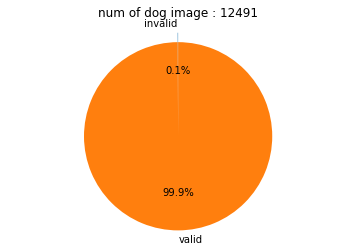

上图为狗的异常图片数量、正常图片数量分布比例（总共有12491张图片）



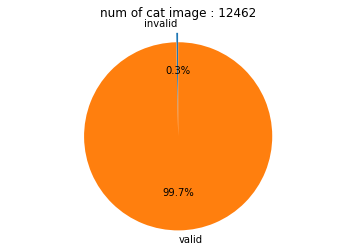

上图为猫的异常图片数量、正常图片数量分布比例（总共有12462张图片）


In [5]:
import matplotlib.pyplot as plt

def show_proportion(invalidImgsCount, totalImgsCount, title):
    invalidPercent = invalidImgsCount / totalImgsCount * 100 
    validPercent = (totalImgsCount - invalidImgsCount) / totalImgsCount * 100 
    
    labels = 'invalid','valid'
    sizes = [invalidPercent, validPercent]
    explode = (0.1, 0) #0.1表示将Hogs那一块凸显出来
    plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90) #startangle表示饼图的起始角度
    plt.axis('equal')  #加入这行代码即可！
    plt.title(title)
    plt.show()

show_proportion(len(invalidDogImgs), totalDogImgCount, 'num of dog image : ' + str(totalDogImgCount))
print('上图为狗的异常图片数量、正常图片数量分布比例（总共有%s张图片）' % totalDogImgCount)
print()
show_proportion(len(invalidCatImgs), totalCatImgCount, 'num of cat image : ' + str(totalCatImgCount))
print('上图为猫的异常图片数量、正常图片数量分布比例（总共有%s张图片）' % totalCatImgCount)

### 展示训练集图片长度-宽度分布散点图

In [12]:
# 先获取所有正常图片的尺寸
import cv2

def get_shape(imageDirPath):
    shape_list = []
    for item in os.listdir(imageDirPath):
        img_path = imageDirPath + '/' + item
        if (not isfile(img_path)):
            break
        img = cv2.imread(img_path)
        shape_list.append([img.shape[0],img.shape[1]])  #shape[0] is height, shape[1] is width 
    return (shape_list)

myShapeList = []
myShapeList.extend(get_shape(destPathDog))
print(len(myShapeList))
myShapeList.extend(get_shape(destPathCat))
print(len(myShapeList))

12491
24953


In [11]:
imgwww = cv2.imread(destPathDog + "/dog.0.jpg")
print(imgwww.shape)

(375, 499, 3)


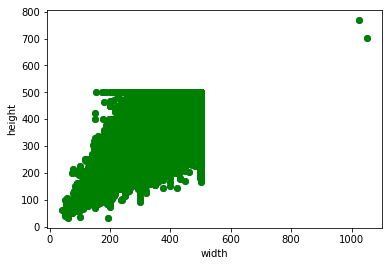

In [16]:
# 绘制图片尺寸的散点分布图

import matplotlib.pyplot as plt

x_index = [i[1] for i in myShapeList]  #shape[1] is width 
y_index = [i[0] for i in myShapeList]  #shape[0] is height

plt.scatter(x_index,y_index)
plt.xlabel('width')
plt.ylabel('height')
plt.plot(x_index,y_index,'go')
plt.show()